### Importerar bibliotek

In [26]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### Importerar dataset samt anger x och y

In [27]:
dataset =pd.read_csv('insurance.csv')

X = dataset.drop('charges', axis=1).values # Alla utom charges
y = dataset['charges'].values 

### Hanterar saknade värden om det finns

In [28]:
# Hanterar saknade värden (om det finns några saknade värden i numeriska kolumner)
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X[:, [0, 2, 3]] = imputer.fit_transform(X[:, [0, 2, 3]])  # Här antas kolumn 0, 2 och 3 är numeriska (age, bmi, children)

### Formaterar om kategoriska variabler till binära kolumner (1:or och 0:or)

In [29]:
# One-Hot Encoding av kategoriska variabler (sex, smoker, region)
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1, 4, 5])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [18]:
print(X)

[[1.0 0.0 0.0 ... 19.0 27.9 0.0]
 [0.0 1.0 1.0 ... 18.0 33.77 1.0]
 [0.0 1.0 1.0 ... 28.0 33.0 3.0]
 ...
 [1.0 0.0 1.0 ... 18.0 36.85 0.0]
 [1.0 0.0 1.0 ... 21.0 25.8 0.0]
 [1.0 0.0 0.0 ... 61.0 29.07 0.0]]


### Dela upp i tränings- och testdata

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Skalning av numeriska funktioner

In [31]:
sc = StandardScaler()
X_train[:, -3:] = sc.fit_transform(X_train[:, -3:])  # Skalning av numeriska kolumner (ålder, bmi, children)
X_test[:, -3:] = sc.transform(X_test[:, -3:])

### Skapa och träna linjära regressionsmodellen

In [32]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

### Förutsägelser på testuppsättningen

In [33]:
y_pred = regressor.predict(X_test)

### Utvärdera modellen

In [34]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

In [35]:
print(f'R-squared (R²): {r2}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')

R-squared (R²): 0.7835929767120723
Mean Squared Error (MSE): 33596915.85136146
Root Mean Squared Error (RMSE): 5796.2846592762735
Mean Absolute Error (MAE): 4181.19447375365


### Skriver ut förutsägelserna och de faktiska värdena för att jämföra

In [36]:
print("\nActual vs Predicted values (Test set):")
for actual, predicted in zip(y_test, y_pred):
    print(f"Actual: {actual}, Predicted: {predicted}")


Actual vs Predicted values (Test set):
Actual: 9095.06825, Predicted: 8969.550274436142
Actual: 5272.1758, Predicted: 7068.747442870865
Actual: 29330.98315, Predicted: 36858.41091154615
Actual: 9301.89355, Predicted: 9454.6785005336
Actual: 33750.2918, Predicted: 26973.173456563498
Actual: 4536.259, Predicted: 10864.113164237357
Actual: 2117.33885, Predicted: 170.28084136497273
Actual: 14210.53595, Predicted: 16903.45028661941
Actual: 3732.6251, Predicted: 1092.4309361411433
Actual: 10264.4421, Predicted: 11218.34318351634
Actual: 18259.216, Predicted: 28101.684552669987
Actual: 7256.7231, Predicted: 9377.734602045186
Actual: 3947.4131, Predicted: 5263.0595179019765
Actual: 46151.1245, Predicted: 38416.04221106753
Actual: 48673.5588, Predicted: 40255.82339284464
Actual: 44202.6536, Predicted: 37098.2535312291
Actual: 9800.8882, Predicted: 15240.393923059675
Actual: 42969.8527, Predicted: 35912.88264434416
Actual: 8233.0975, Predicted: 9112.523987031154
Actual: 21774.32215, Predicted: 

### Skapar en scatterplot för att jämföra förutsagda och faktiska värden

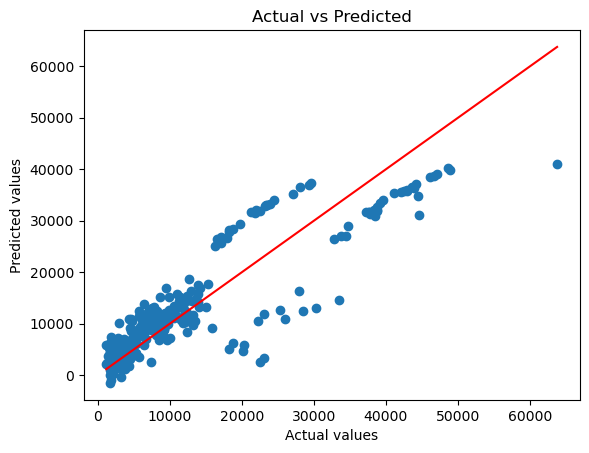

In [37]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal linje
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted')
plt.show()